# Tutorial9

This notebook contains my attempt at tutorial 9 for the machine learning course.

# Libraries

In [28]:
# system libraries

import os
import sys
sys.path.insert(0,'..')

# mathematical

import numpy as np

# data manipulation and generatino

from sklearn.datasets import make_blobs
from Extra_Work.PythonFiles.datasets_huthwaite import get_cov

# preprocessing

from sklearn.preprocessing import MinMaxScaler

# modelling

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# plotting

from Extra_Work.PythonFiles.plotting import plot_classes
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Clustering

Text(0.5, 1.0, 'The blobs for the proble, with n_samples = 1500 and centres = 6')

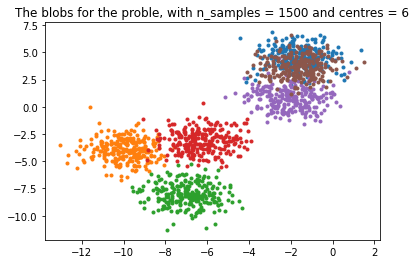

In [2]:
n_samples = 1500
centres = 6

X, y = make_blobs(n_samples = n_samples, centers = centres, random_state = 1)

fig, ax = plot_classes(X,y)
plt.title('The blobs for the proble, with n_samples = {} and centres = {}'
          .format(n_samples, centres))


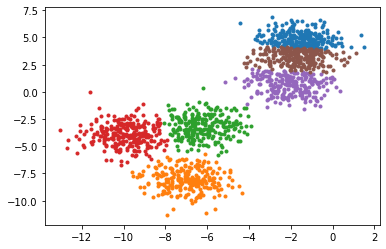

In [3]:
model = KMeans(n_clusters = centres)
yhat = model.fit_predict(X)

fig, ax = plot_classes(X, yhat)

The clustering algorithm does not perform well for some of the clusters because they are 'mixed'. We can experimnet this for other seeds.

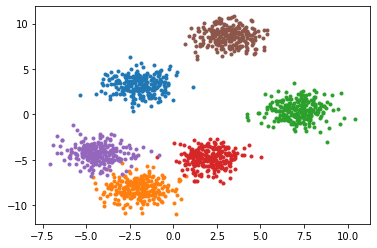

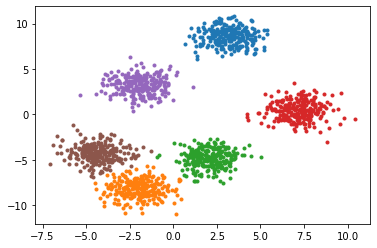

In [4]:
""" Try this for different seeds """


X, y = make_blobs(n_samples = n_samples, centers = centres, random_state = 193)

fig, ax = plot_classes(X,y)

fig, ax = plot_classes(X, model.fit_predict(X))

# the model actually does fairly well now!

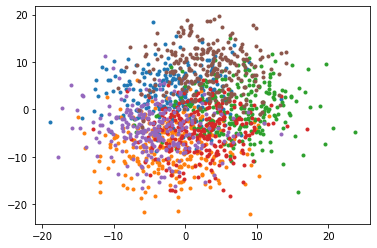

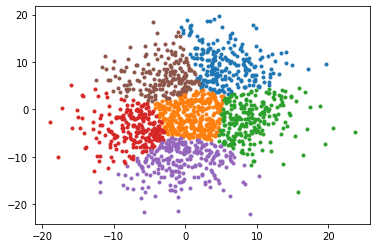

In [5]:
""" Try this for different std """

X, y = make_blobs(n_samples = n_samples,
                  centers = centres,
                  random_state = 193,
                  cluster_std = 5
                 )

fig, ax = plot_classes(X,y)

fig, ax = plot_classes(X, model.fit_predict(X))

# model performs worse since they are mixed

In [6]:
# other clustering methods to try: affinity propagation and DBSCAN

# Principal Component Analysis

<IPython.core.display.Javascript object>


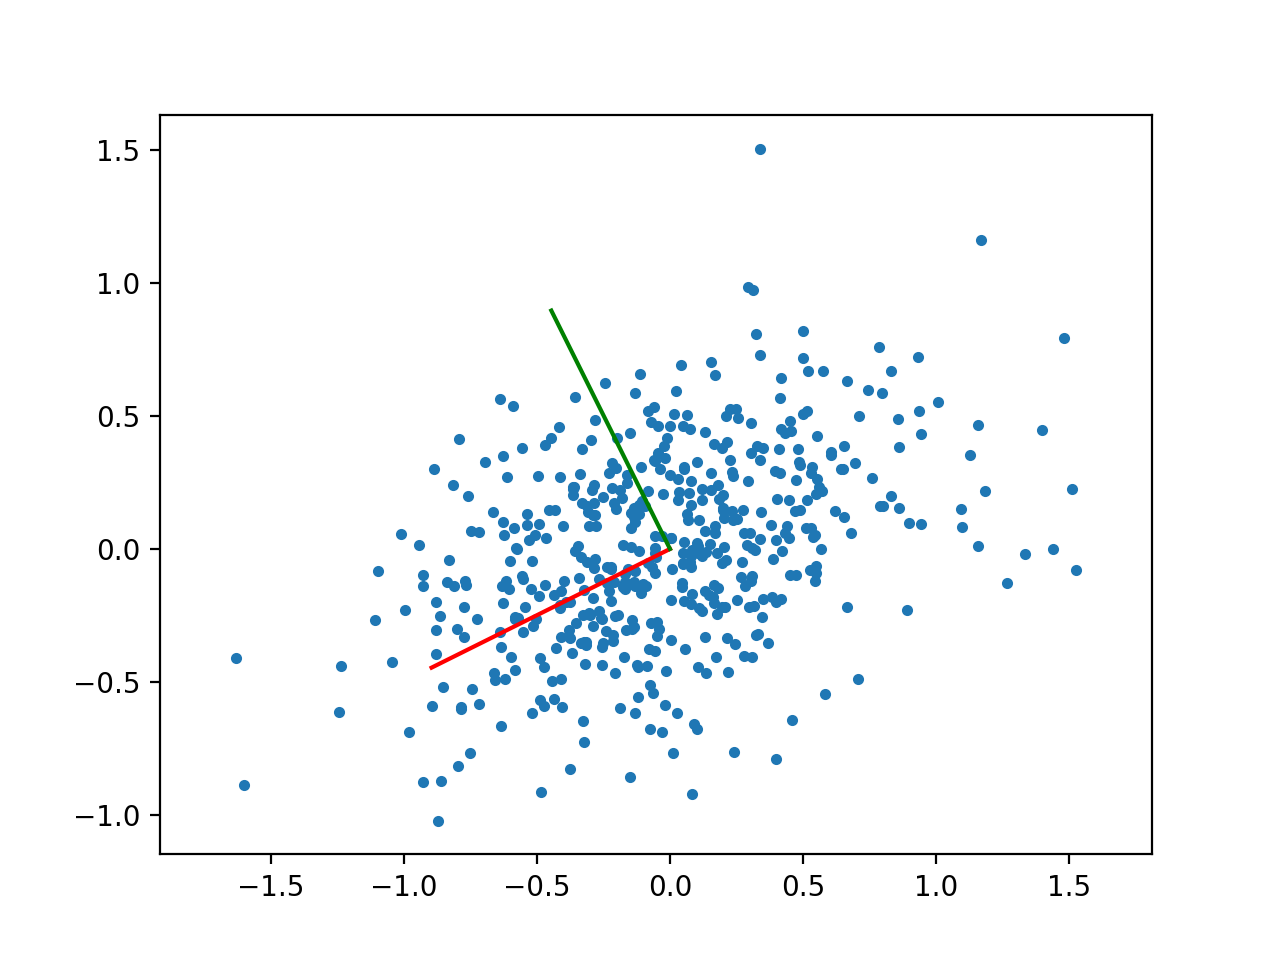

(-1.787732783206478,
 1.6826722842506356,
 -1.1470261311373033,
 1.6289201197721037)

In [79]:
# generate data
%matplotlib notebook
np.random.seed(1)
mu_x = 0
mu_y = 0
std_x = 0.3
std_y = 0.1
covar = get_cov(std_x, std_y, rotangdeg = 23)
X = np.random.multivariate_normal([mu_x, mu_y], covar, 500)
fig, ax = plt.subplots()
ax.plot(X[:,0], X[:,1],'.')
ax.axis('equal')

In [80]:
pca = PCA(n_components = 2)
pca.fit(X)

components = pca.components_
ax.plot([0,components[0,0]], [0,components[0,1]],'red')
ax.plot([0,components[1,0]], [0,components[1,1]],'green')

In [81]:
vector_1 = [1, 0]
vector_2 = components[0,:]

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)
180 - angle*180/np.pi

# why is the angle not 23?
# I'm not sure I get this? I get it's a question of realising how the data can be
# improved to actually improve the angle?

# we can try with scaled data?

26.464613930033607

In [82]:
# explained variance
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))

# apparently, the entire variance is explained.. why then is our angle odd?

[0.74873154 0.25126846]
1.0


# Scaling

<IPython.core.display.Javascript object>


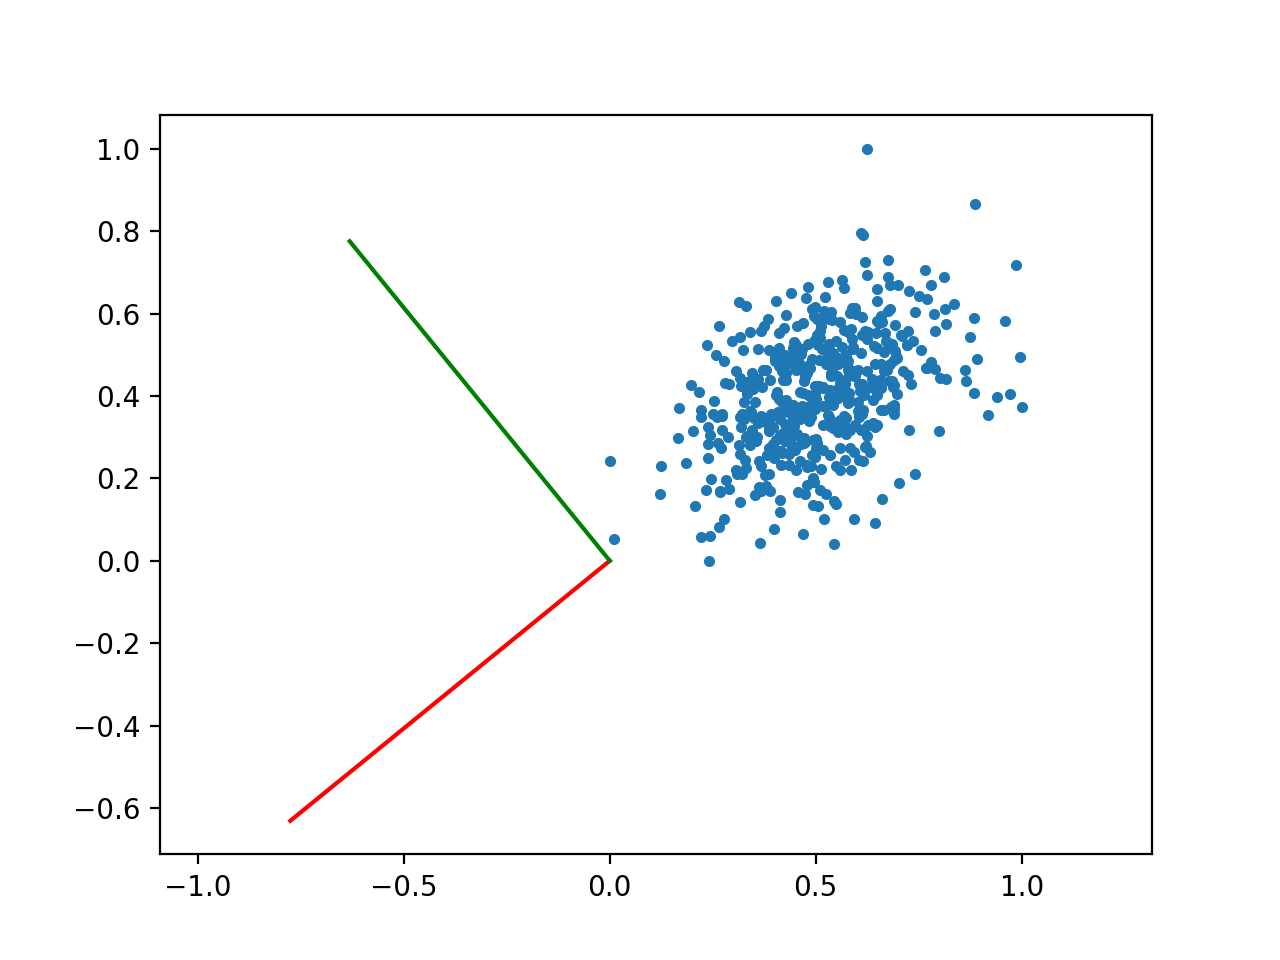

39.14728541530428

In [85]:
# let's try scaling with minmax scaler
%matplotlib notebook


X_scaled = MinMaxScaler().fit_transform(X)

fig, ax = plt.subplots()
ax.plot(X_scaled[:,0], X_scaled[:,1],'.')
ax.axis('equal')

pca = PCA(n_components = 2)
pca.fit(X_scaled)

components = pca.components_
ax.plot([0,components[0,0]], [0,components[0,1]],'red')
ax.plot([0,components[1,0]], [0,components[1,1]],'green')

vector_1 = [1, 0]
vector_2 = components[0,:]

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)
180 - angle*180/np.pi

# unclear why our scaling makes the angle less correct

<IPython.core.display.Javascript object>


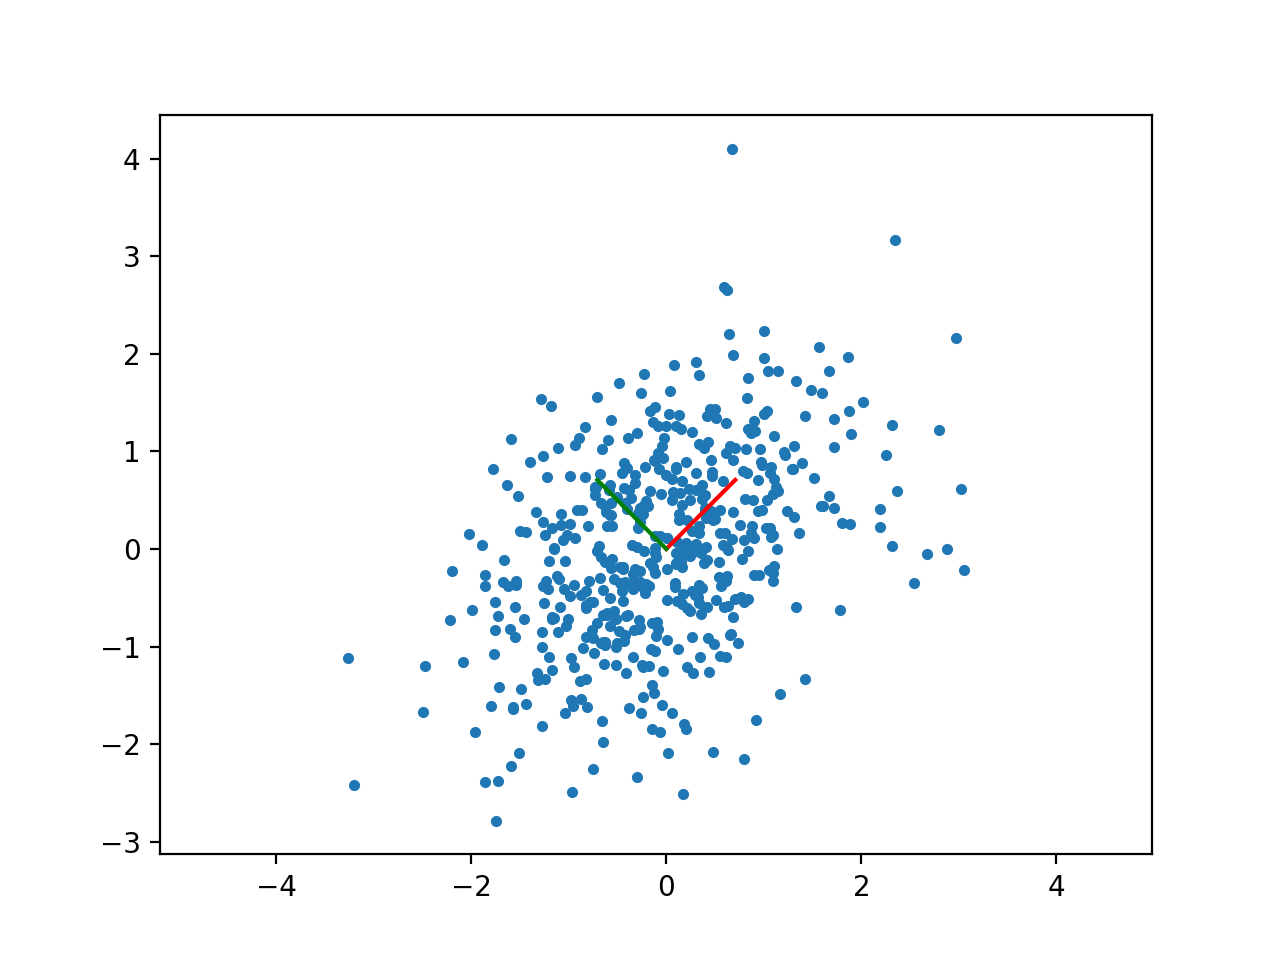

44.999999999999986

In [96]:
# let's try scaling with standard scaler

X_scaled = X/X.std(axis = 0)

fig, ax = plt.subplots()
ax.plot(X_scaled[:,0], X_scaled[:,1],'.')
ax.axis('equal')

pca = PCA(n_components = 2)
pca.fit(X_scaled)

components = pca.components_
ax.plot([0,components[0,0]], [0,components[0,1]],'red')
ax.plot([0,components[1,0]], [0,components[1,1]],'green')

vector_1 = [1, 0]
vector_2 = components[0,:]

unit_vector_1 = vector_1 / np.linalg.norm(vector_1)
unit_vector_2 = vector_2 / np.linalg.norm(vector_2)
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle = np.arccos(dot_product)
angle*180/np.pi

# rather confused eh?


# Removing outliers?

<IPython.core.display.Javascript object>


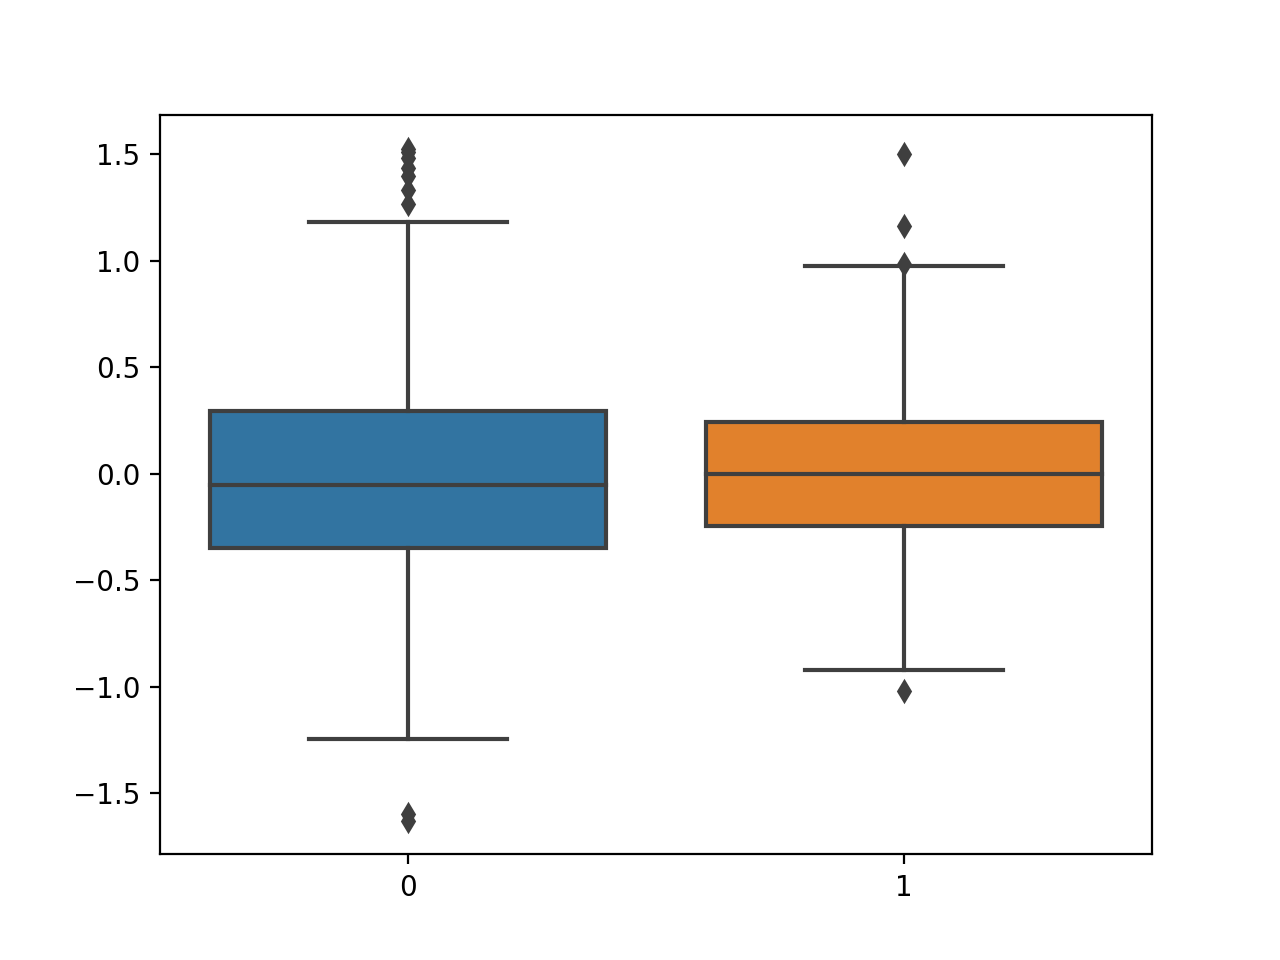

In [84]:
fig, ax = plt.subplots()
ax = sns.boxplot(data = X)

# maybe try removing the outliers?

In [78]:
# could try removing outliers? Best come back to this later